In [ ]:
!pip install yfinance --upgrade --no-cache-dir


In [ ]:
!pip install python-bcb

In [ ]:
#Análise de Dados econômicos usando diferentes bases de dados#

#Importando as bibliotecas necessárias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()

import pandas_datareader.data as web
import yfinance as yf
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.\n
#1.1.2 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
import bcb 
from bcb import sgs

In [ ]:
#Base de dados do banco do Brasil usando API

def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df
    

In [ ]:
#Importando dados usando a biblioteca BCB
ipca2 = sgs.get(('IPCA', 433), last=36)
print(ipca2)
ipca2['IPCA'].plot(figsize=(16,2))

In [ ]:
#Percorrendo a base de dados do Yahoo
yf.pdr_override()
# E com o comando web.get_data_yahoo podemos ter os dados históricos da bovespa
# ÍNDICES BRASILEIROS
ibov = web.get_data_yahoo('^BVSP', start='2000-11-03')
ifix = web.get_data_yahoo('IFIX.SA', start='2000-01-01')
#ÍNDICES AMERICANOS
sp500 = web.get_data_yahoo('^GSPC', start='2000-01-01')
#COMMODITIES
crudeoil = web.get_data_yahoo('CL=F', start='2000-01-01')
gold = web.get_data_yahoo('GC=F', start='2000-01-01')
#CRIPTOMOEDAS
btcusd = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2019,1,1), end=today)


# RENDA FIXA BR & INDICES DE INFLAÇÃO BR
ipca = sgs.get(('IPCA', 433), last=12)
igpm = sgs.get(('IGPM', 189), last=12)
selic_meta = sgs.get(('SELIC_META', 432), last=12)
reservas_internacionais = sgs.get(('RESERVAS INT', 13621), last=12)
cdi = sgs.get(('CDI', 12), last=(12*365))

In [ ]:
print(btcusd)

In [ ]:
print(cdi)
cdi['CDI'].plot(figsize=(16,2))

In [ ]:
igpm.plot()

In [ ]:
selic_meta.plot()

In [ ]:
reservas_internacionais.plot(figsize=(16,2))


In [ ]:
ibov['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('IBOV')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
ibov.tail(7) 

In [ ]:
ibov.head(7)

In [ ]:
ibov.tail(15)['Adj Close'].plot(figsize=(16,2))
plt.title('IBOV - Últimos 7 dias')
plt.xlabel('Intervalo de tempo - Dias')
plt.ylabel('BVSP - 15 dias passados')

In [ ]:
ibov['Close'].plot()
plt.title('Ibovespa - Histórico')
plt.xlabel('Anos')
plt.ylabel('BVSP')

In [ ]:
sp500['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('SP500')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
btcusd['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('btc-usd')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [ ]:
ipca.plot(figsize=(16,2))
plt.title("IPCA")
plt.xlabel('Intervalo de Tempo em anos')
plt.ylabel('Inflação (%)')

In [ ]:
#RETORNOS ACUMULADOS

data_inicio = '2010-01-01'
ibovretorno = yf.download(tickers='^BVSP', start=datetime.datetime(2010,1,1))[['Adj Close']]
ibov_retorno = ibovretorno.pct_change()
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1

selic_meta_acumulado = (1 + selic_meta[selic_meta.index >= data_inicio] / 100).cumprod()
selic_meta_acumulado.iloc[0] = 1


In [ ]:
ibov_retorno_acumulado.plot()



In [ ]:
cdi_acumulado.plot()

In [ ]:
selic_meta_acumulado.plot()

In [ ]:
#CDI vs. IPCA

ax = plt.subplot()
ax.plot(ipca_acumulado, color='red')
ax.plot(cdi_acumulado, color='blue')
ax.plot(ibov_retorno_acumulado, color='green')


In [ ]:
#VOLATILIDADE
pct_ibov = (ibov.Close/ibov.Open).apply(lambda x:x-1)*100
display(pct_ibov.tail(10))


In [ ]:
pct_ibov.tail(10).plot(figsize=(16,2), title='IBOV Volatilidade - 15d')

In [ ]:
pct_ibov.plot(figsize=(16,2), title='IBOV Volatilidade - Completo')

In [ ]:
#
ipca2022 = ipca[(ipca.index.year >= 2021)]
ipca2022.plot()

In [ ]:
#FILTRO POR MÊS
ibov_fatiado12 = ibov[ibov.index.month == 12]
ibov_fatiado12.tail()

In [ ]:
# FUNDOS IMOBILIÁRIOS #
habt11 = web.get_data_yahoo('HABT11.SA', start='2020-02-01', end=today)
tgar11 = web.get_data_yahoo('TGAR11.SA', start='2020-02-01', end=today)
xplg11 = web.get_data_yahoo('XPLG11.SA', start='2020-02-01', end=today)
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end=today)
flma11 = web.get_data_yahoo('FLMA11.SA', start='2020-02-01', end=today)
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end=today)
bcff11 = web.get_data_yahoo('BCFF11.SA', start='2020-02-01', end=today)
xpsf11 = web.get_data_yahoo('XPSF11.SA', start='2020-02-01', end=today)
xpci11 = web.get_data_yahoo('XPCI11.SA', start='2020-02-01', end=today)
xpml11 = web.get_data_yahoo('XPML11.SA', start='2020-02-01', end=today)

In [ ]:
cota_xpci11 = xpci11["Adj Close"].plot(figsize=(16,2), label="xpci11 - cotação")

In [ ]:
cotabcff11 = bcff11["Adj Close"].plot(figsize=(8,2), label=bcff11)
cotaxpsf11 = xpsf11["Close"].plot(figsize=(8,2), label=xpsf11)
cotamxrf11 = mxrf11["Close"].plot(figsize=(8,2), label=mxrf11)
cotaxplg11 = xplg11["Close"].plot(figsize=(8,2), label=xplg11)
cotaxpci11 = xpci11["Close"].plot(figsize=(8,2), label=xpci11)
cotaknri11 = knri11["Close"].plot(figsize=(8,2), label=knri11)

[*********************100%***********************]  1 of 1 completed


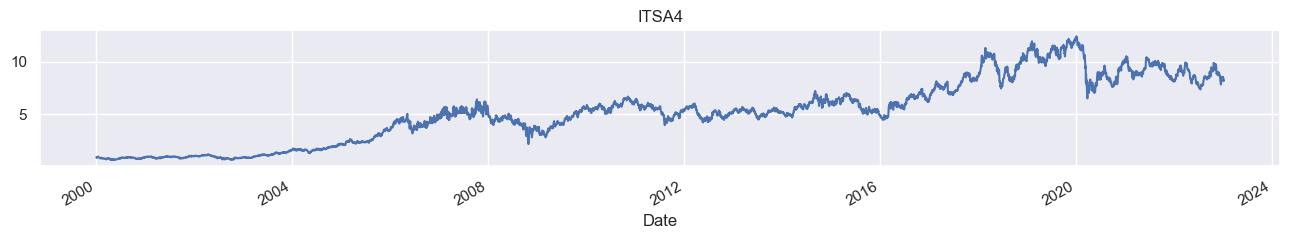

In [103]:
# Baixando dados da sobre ITSA4 pelo YF
itsa4 = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2000,1,1), end=datetime.datetime.today())
# Gráfico do fechamento da cota
cota_itsa4 = itsa4["Close"].plot(figsize=(16,2), title='ITSA4')

In [105]:
#Função lambda da volatilidade
pct_itsa4 = (itsa4.Close/itsa4.Open).apply(lambda x:x-1)*100

display(pct_itsa4.head(10))


Date
2000-01-03    6.417129
2000-01-04   -6.250013
2000-01-05    7.734842
2000-01-06    2.061790
2000-01-07   -1.500032
2000-01-10    0.990118
2000-01-11   -2.403793
2000-01-12   -2.926890
2000-01-13   -4.878041
2000-01-14    0.000000
dtype: float64

<AxesSubplot: xlabel='Date'>

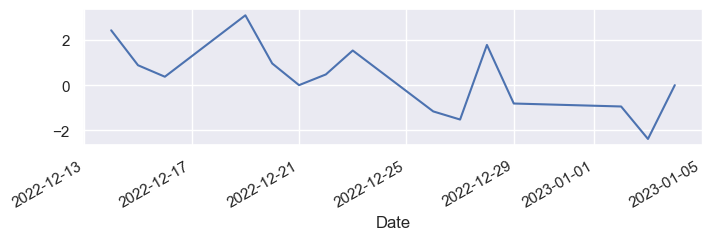

In [109]:
#Gráfico da volatilidade
pct_itsa4.tail(15).plot(figsize=(8,2))

In [ ]:
#CRIAR FUNÇÃO QUE EXECUTA O PROCEDIMENTO DE ANGARIAR O GRÁFICO, A VOLATILIDADE E EXIBIR
# O PARÂMETRO É O TICKER

In [111]:
#BIBLIOTECA FUNDAMENTOS

fts_itub4 = fts.get_fundamentos('ITUB4')
print(fts_itub4)



                     Mercado                                           \
ITUB4 Quantidade de Ações ON Quantidade de Ações PN Última Cotação ON   
Data                                                                    
                         NaN                    NaN               NaN   
2008             288633338.0           2.862383e+09             13.03   
2009             288633338.0           2.862383e+09             18.18   
2010               2289286.0           2.281650e+06             18.79   
2011               2289286.0           2.281650e+06             16.37   
2012               2289286.0           2.281650e+06             18.90   
2013               2518215.0           2.509815e+06             19.63   
2014               2770037.0           2.760796e+06             21.53   
2015               3047040.0           3.036876e+06             16.39   
2016               3351744.0           3.230563e+06             20.00   
2017               3305527.0           3.230563e+06

In [119]:
#Puxando uma coluna específica
fts_itub4['Dividendos']


ITUB4,Dividendos e JCP,DY,Payout
Data,,,
,NaN,NaN,NaN
2008,NaN,NaN,NaN
2009,NaN,NaN,NaN
2010,4.588486e+09,4.4921,0.4467
2011,5.206470e+09,1.9960,0.4379
2012,5.368868e+09,1.7383,0.4971
2013,6.318783e+09,1.7803,0.5419
2014,7.007506e+09,1.5586,0.4029
2015,7.672530e+09,1.1640,0.3639


<AxesSubplot: xlabel='Data'>

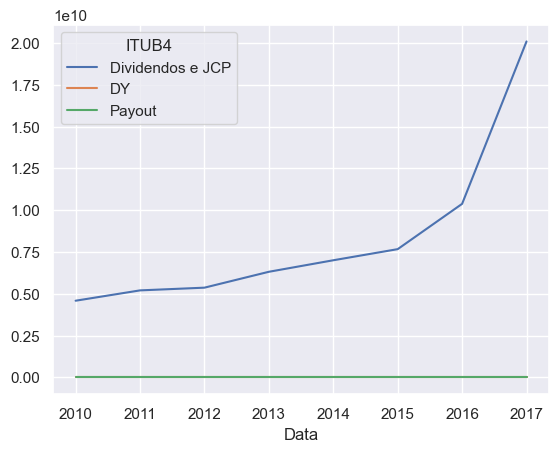

In [120]:
fts_itub4['Dividendos'].plot()


In [112]:
for col in fts_itub4.columns:
    print(col)

('Mercado', 'Quantidade de Ações ON')
('Mercado', 'Quantidade de Ações PN')
('Mercado', 'Última Cotação ON')
('Mercado', 'Última Cotação PN')
('Mercado', 'Valor de Mercado')
('Resultados', 'Receita Líquida')
('Resultados', 'PSR')
('Resultados', 'Resultado Bruto')
('Resultados', 'Margem Bruta')
('Resultados', 'EBIT')
('Resultados', 'Margem EBIT')
('Resultados', 'P/EBIT')
('Resultados', 'Lucro Líquido')
('Resultados', 'P/L')
('Resultados', 'LPA')
('Patrimônio', 'Ativo Total')
('Patrimônio', 'P/Ativo')
('Patrimônio', 'Giro')
('Patrimônio', 'EBIT/Ativo')
('Patrimônio', 'PL')
('Patrimônio', 'ROE')
('Patrimônio', 'VPA')
('Patrimônio', 'P/VPA')
('Patrimônio', '(A - PL)/PL')
('Patrimônio', 'EM')
('Caixa', 'Disponibilidades')
('Caixa', 'Dinheiro em Caixa')
('Caixa', 'Aplicações Financeiras')
('Dívida', 'Dívida Líquida')
('Dívida', 'EV')
('Dívida', 'EV/EBIT')
('Liquidez e Solvência', 'Ativo Circulante')
('Liquidez e Solvência', 'Ativo Não Circulante')
('Liquidez e Solvência', 'Ativo Circulante L

In [113]:
 #Todos os fundamentos do primeiro trimestre de 2020,
ftsitub41t20 = fts.get_fundamentos('ITUB4', year=2020, quarter=1)
#Todos os fundamentos dos terceiros trimestres ou de qualquer semestre específico, basta mudar o valor 3 por outro
ftsitub43t = fts.get_fundamentos('ITUB4', quarter=3)

In [114]:

 
#Fundamentos das empresas em carteira
#Todos os fundamentos históricos, anualmente
#O comando fts.get_fundamentos serve para puxar o fundamento da empresa
ftsbees3 = fts.get_fundamentos('BEES3')
ftsabev3 = fts.get_fundamentos('ABEV3')
ftsklbn4 = fts.get_fundamentos('KLBN4')
ftswege3 = fts.get_fundamentos('WEGE3')
ftsjhsf3 = fts.get_fundamentos('JHSF3')
ftstris3 = fts.get_fundamentos('TRIS3')
ftstpis3 = fts.get_fundamentos('TPIS3')
ftsbpan4 = fts.get_fundamentos('BPAN4')
ftsitub4 = fts.get_fundamentos('ITUB4')
ftsrcsl4 = fts.get_fundamentos('RCSL4')
ftsoibr3 = fts.get_fundamentos('OIBR3')
ftsposi3 = fts.get_fundamentos('POSI3')
ftstaee3 = fts.get_fundamentos('TAEE3')
ftsengi4 = fts.get_fundamentos('ENGI4')
ftssula4 = fts.get_fundamentos('SULA4')
ftsslce3 = fts.get_fundamentos('SLCE3')
ftsegie3 = fts.get_fundamentos('EGIE3')
ftsmrve3 = fts.get_fundamentos('MRVE3')
ftsgrnd3 = fts.get_fundamentos('GRND3')
ftsitsa4 = fts.get_fundamentos('ITSA4')
ftsigta3 = fts.get_fundamentos('IGTA3')

In [115]:
#Balanços anuais
balance_petr4 = fts.get_balanco('PETR4')
for col in balance_petr4:
    print(col)

('Ativo Total', 'Ativo Total')
('Ativo Circulante', 'Ativo Circulante')
('Ativo Circulante', 'Caixa e Equivalentes de Caixa')
('Ativo Circulante', 'Aplicações Financeiras')
('Ativo Circulante', 'Contas a Receber')
('Ativo Circulante', 'Estoques')
('Ativo Circulante', 'Ativos Biológicos')
('Ativo Circulante', 'Tributos a Recuperar')
('Ativo Circulante', 'Despesas Antecipadas')
('Ativo Circulante', 'Outros Ativos Circulantes')
('Ativo Não Circulante', 'Ativo Realizável a Longo Prazo')
('Ativo Não Circulante', 'Aplicações Financeiras Avaliadas a Valor Justo')
('Ativo Não Circulante', 'Aplicações Financeiras Avaliadas ao Custo Amortizado')
('Ativo Não Circulante', 'Contas a Receber')
('Ativo Não Circulante', 'Estoques')
('Ativo Não Circulante', 'Ativos Biológicos')
('Ativo Não Circulante', 'Tributos Diferidos')
('Ativo Não Circulante', 'Despesas Antecipadas')
('Ativo Não Circulante', 'Créditos com Partes Relacionadas')
('Ativo Não Circulante', 'Outros Ativos Não Circulantes')
('Ativo Não C

In [125]:
VT = web.get_data_yahoo('VT')


[*********************100%***********************]  1 of 1 completed
